In [26]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier as RFC 
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import MultinomialNB as MNB
import matplotlib.pyplot as plt
df = pd.read_csv('IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
X=df.review

In [7]:
y=df.sentiment

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Exercise 1

In [9]:
pipe = Pipeline([('CV',CountVectorizer()), ('Randomforest', RFC(n_estimators=50,criterion = 'entropy'))])
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.84072

In [10]:
predicted = pipe.predict(X_test)
report = classification_report(y_test,predicted)

In [11]:
print(report)

              precision    recall  f1-score   support

    negative       0.83      0.85      0.84      6148
    positive       0.85      0.83      0.84      6352

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



# Exercise 2

In [12]:
pipe2 = Pipeline([('CV',CountVectorizer()), ('Randomforest', KNN(n_neighbors=10,metric = 'euclidean' ))])
pipe2.fit(X_train, y_train)
pipe2.score(X_test,y_test)

0.65168

In [13]:
predicted = pipe.predict(X_test)
report = classification_report(y_test,predicted)

In [14]:
print(report)

              precision    recall  f1-score   support

    negative       0.83      0.85      0.84      6148
    positive       0.85      0.83      0.84      6352

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



# Exercise 3

In [15]:
pipe2 = Pipeline([('CV',CountVectorizer()), ('MNB', MNB())])
pipe2.fit(X_train, y_train)
pipe2.score(X_test,y_test)

0.84472

In [16]:
predicted = pipe.predict(X_test)
report = classification_report(y_test,predicted)

In [17]:
print(report)

              precision    recall  f1-score   support

    negative       0.83      0.85      0.84      6148
    positive       0.85      0.83      0.84      6352

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



In [27]:
c = confusion_matrix(X_test,predicted)

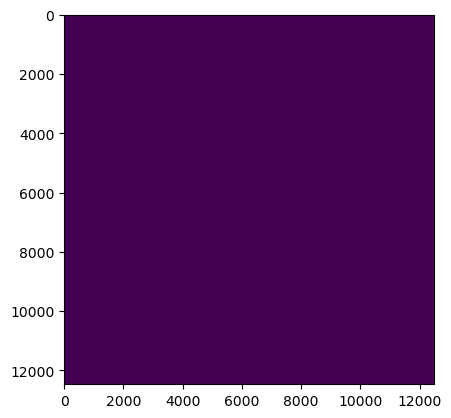

In [28]:
plt.imshow(c)